<a href="https://colab.research.google.com/github/caiofrz/sistemas_inteligentes/blob/main/Atividade_Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATASET - Student Marks Dataset** (https://www.kaggle.com/datasets/yasserh/student-marks-dataset)

Os dados consistem em notas de estudantes, incluindo o tempo de estudo e o número de cursos. O conjunto de dados foi baixado do Repositório de Aprendizado de Máquina da UCI.



*   **number_courses** <br>
    Número de cursos escolhidos pelo aluno
*   **time_study** <br>
    Tempo médio estudado por dia pelo aluno
*   **Marks** <br>
    Notas obtidas pelo aluno
    

Para realizar a atividade utilizei as variáveis Marks e time_study para aplicar a Regressão Linear Simples.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = [7, 7]

In [20]:
columns = ['number_courses', 'time_study', 'Marks']

In [57]:
df = pd.read_csv("/content/Student_Marks.csv")
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [55]:
# Convertendo horas para minutos
# df['time_study'] = df['time_study'] * 60

# print(df)

In [58]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


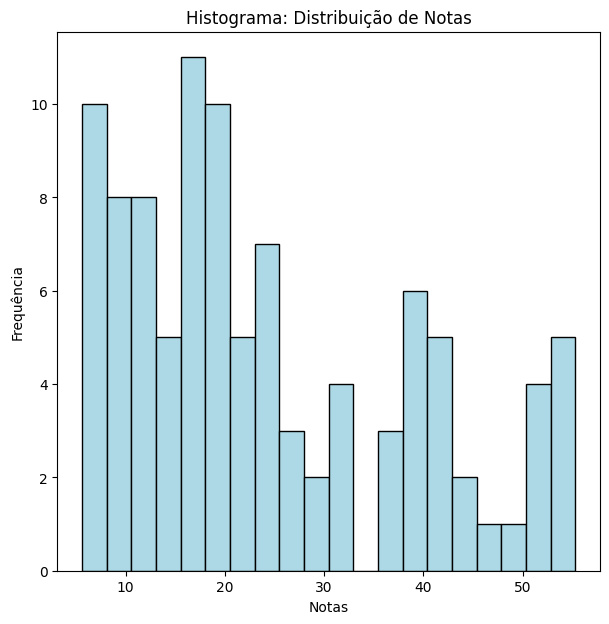

In [76]:
# Histograma da distribuição de 'Marks'
plt.hist(df['Marks'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histograma: Distribuição de Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

In [80]:
X_time_study = df[['time_study']]
y = df[['Marks']]

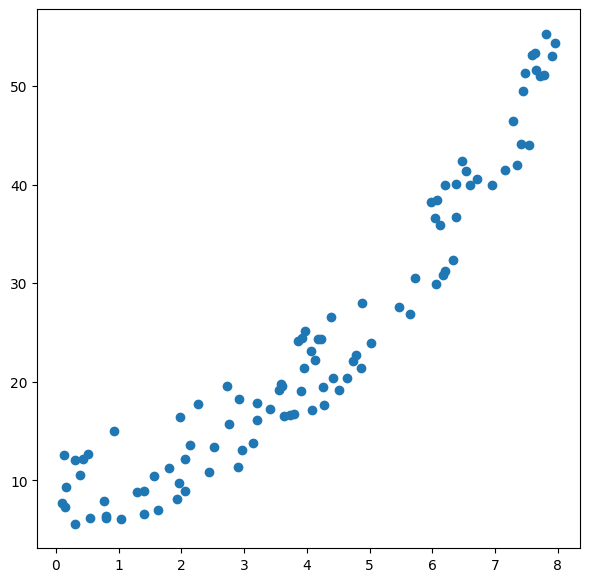

In [81]:
# Pontuação x Media de horas estudadas por dia
plt.scatter(X_time_study,y)

In [82]:
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [83]:
# Criar e ajustar modelo de regressão linear para time_study
modelo_time_study = LinearRegression()
modelo_time_study.fit(X_time_study, y)

LinearRegression()

In [84]:
y_pred_time_study = modelo_time_study.predict(X_time_study)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


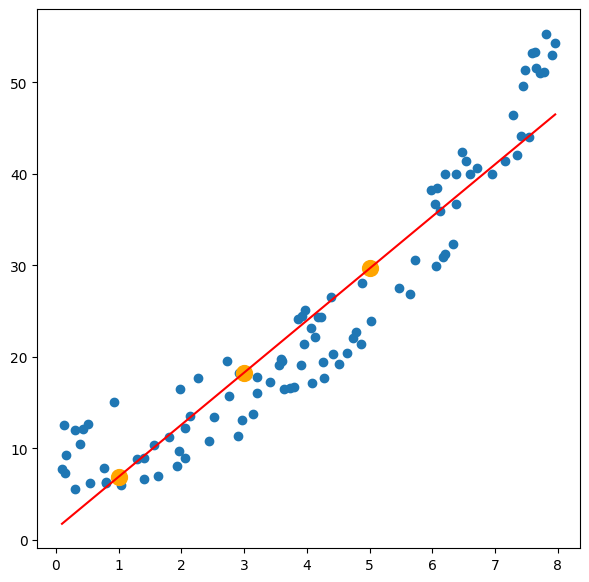

In [89]:
plt.scatter(X_time_study,y)
plt.plot(X_time_study, y_pred_time_study, color='red')

entrada_x= [[5], [1], [3]]
y_pred=modelo_time_study.predict(entrada_x)
plt.scatter(entrada_x,y_pred, color='orange', s=130)
plt.show()

### **Dividindo Treino e Teste**

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_time_study, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred_train=modelo.predict(X_train)
y_pred_test=modelo.predict(X_test)

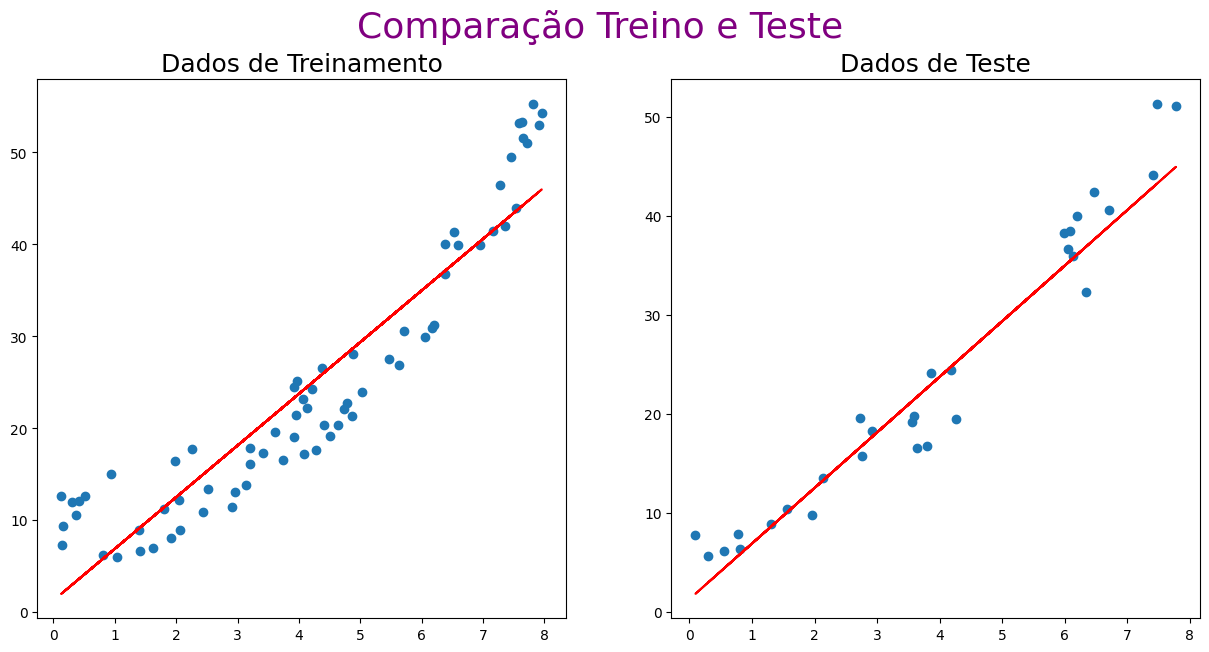

In [91]:
fig1, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
fig1.suptitle('Comparação Treino e Teste', fontsize=26,color='purple')
ax1.scatter(X_train,y_train)
ax1.set_title('Dados de Treinamento',fontsize=18)
ax1.plot(X_train, y_pred_train, color='red')
ax2.scatter(X_test,y_test)
ax2.set_title('Dados de Teste', fontsize=18)
ax2.plot(X_test, y_pred_test, color='red')
plt.show()

In [93]:
r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.86
R2 no set de teste: 0.94
